In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [105]:
data=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [106]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [107]:
data.isnull().sum().sum()

np.int64(0)

In [108]:
data.shape

(1436, 11)

In [109]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


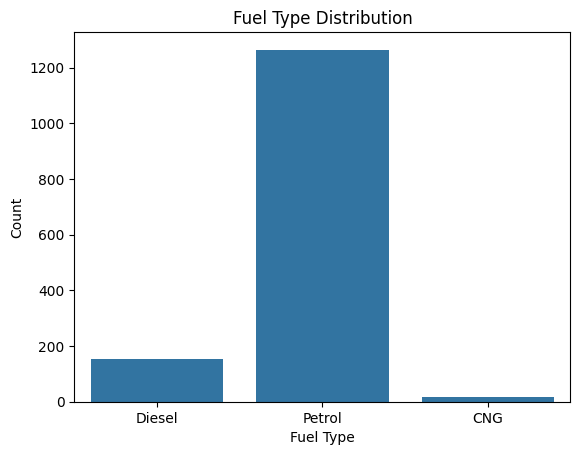

In [111]:
sns.countplot(x='Fuel_Type', data=data)
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()


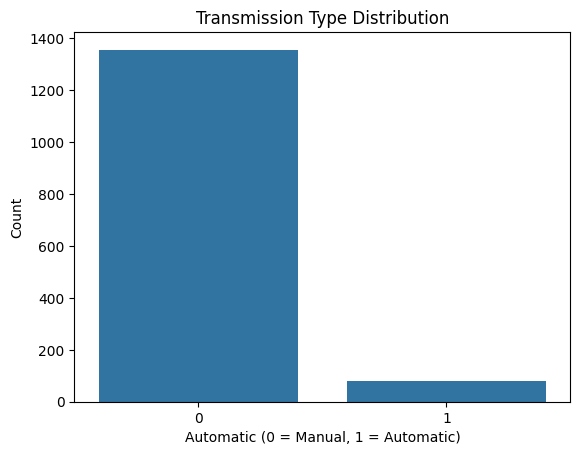

In [112]:
sns.countplot(x='Automatic', data=data)
plt.title("Transmission Type Distribution")
plt.xlabel("Automatic (0 = Manual, 1 = Automatic)")
plt.ylabel("Count")
plt.show()


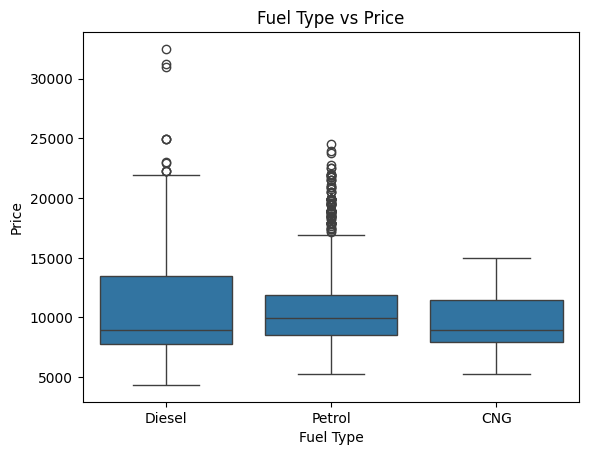

In [113]:
sns.boxplot(x='Fuel_Type', y='Price', data=data)
plt.title("Fuel Type vs Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()


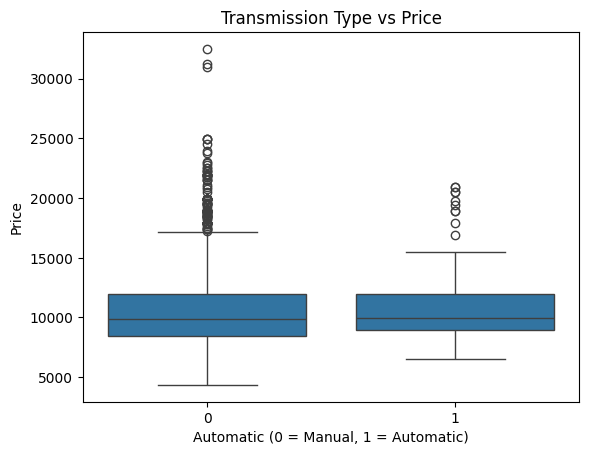

In [114]:
sns.boxplot(x='Automatic', y='Price', data=data)
plt.title("Transmission Type vs Price")
plt.xlabel("Automatic (0 = Manual, 1 = Automatic)")
plt.ylabel("Price")
plt.show()


In [115]:
#finding outliers in the data manually
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]


In [116]:
len(outliers)


110

In [117]:
data['Price'] = np.clip(data['Price'], lower_bound, upper_bound)


In [118]:
data


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


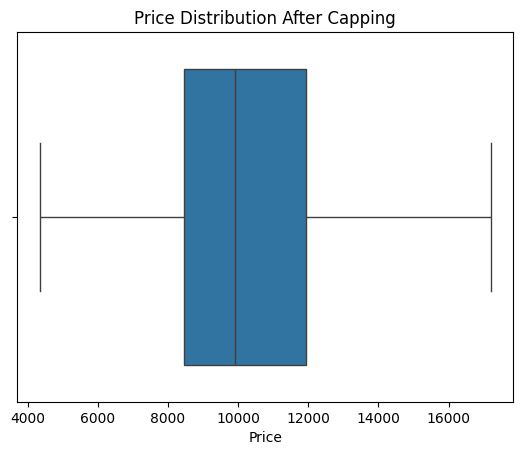

In [119]:
sns.boxplot(x=data['Price'])
plt.title("Price Distribution After Capping")
plt.show()


In [120]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


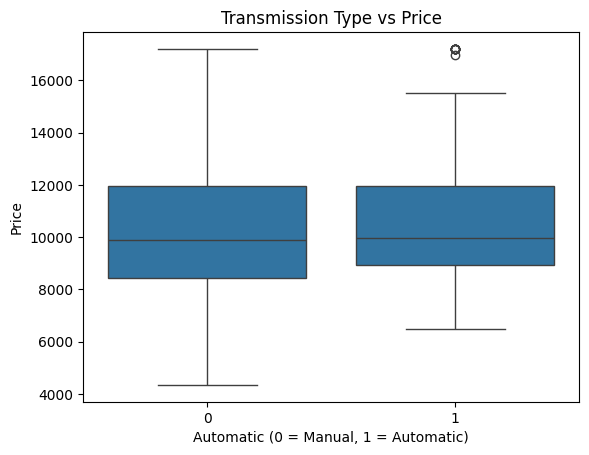

In [121]:
sns.boxplot(x='Automatic', y='Price', data=data)
plt.title("Transmission Type vs Price")
plt.xlabel("Automatic (0 = Manual, 1 = Automatic)")
plt.ylabel("Price")
plt.show()


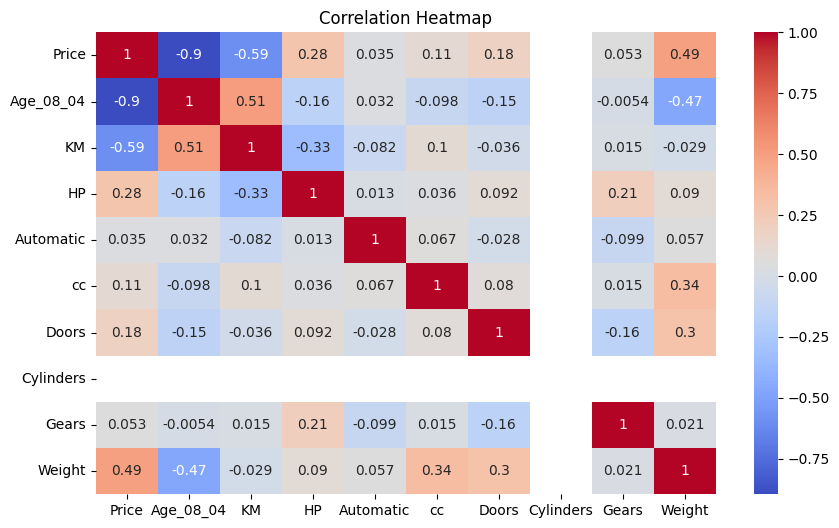

In [122]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [123]:
numerical_features = ['Price',  'KM', 'HP',  'Doors', 'Weight']


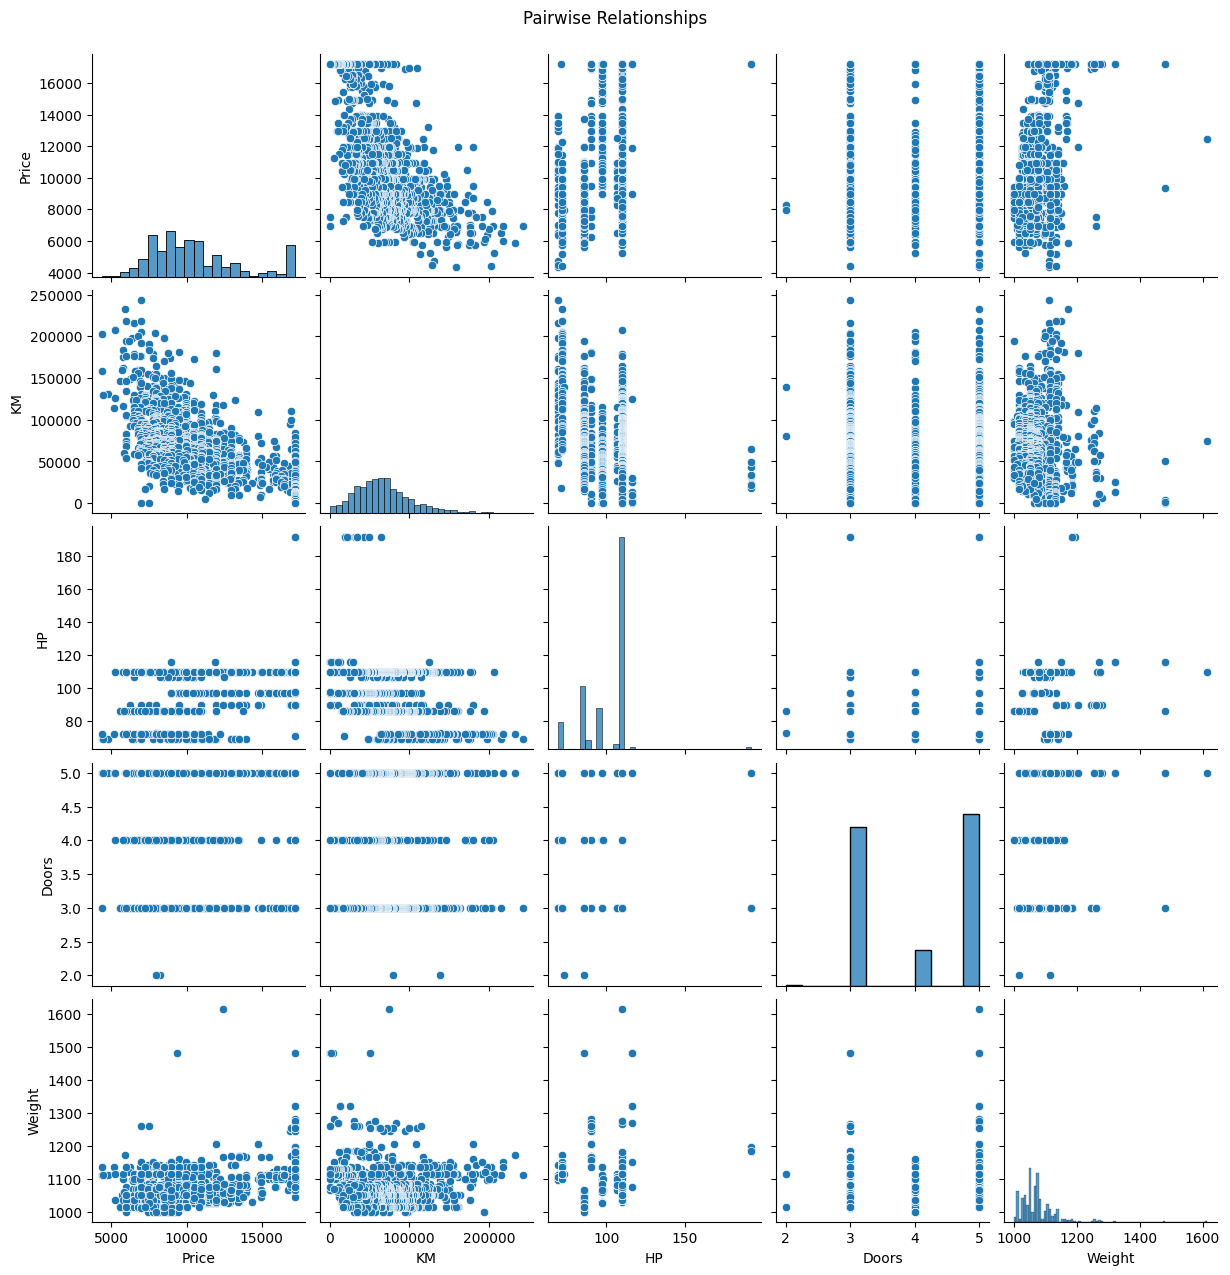

In [124]:
sns.pairplot(data[numerical_features])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


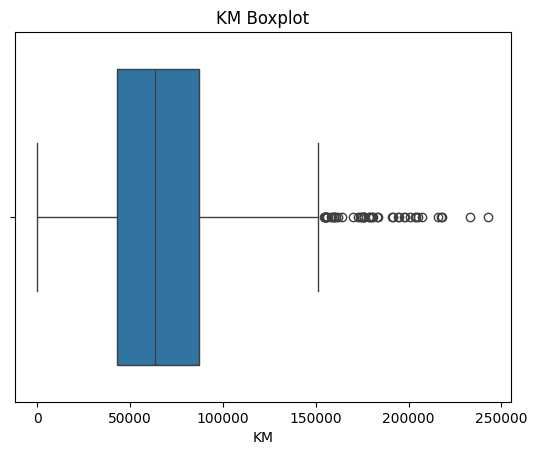

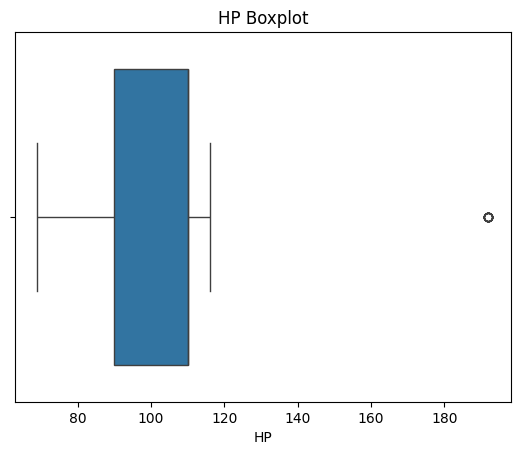

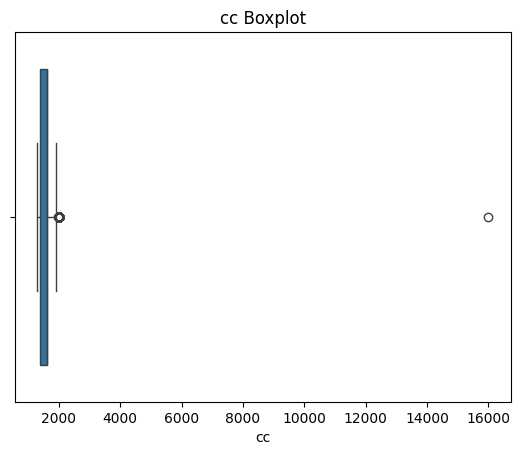

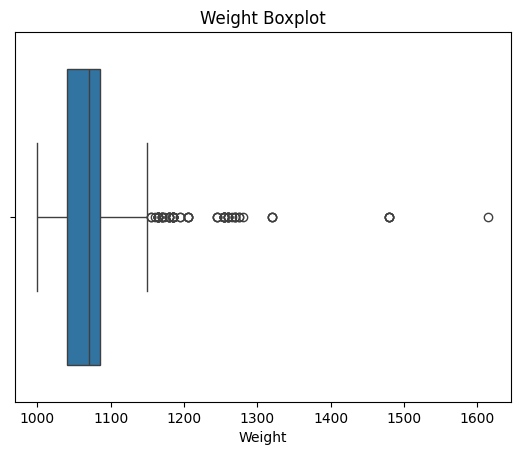

In [125]:
for feature in ['KM', 'HP', 'cc', 'Weight']:
    sns.boxplot(x=data[feature])
    plt.title(f"{feature} Boxplot")
    plt.show()


In [126]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [149]:
# Capping outliers in KM, HP, cc, and Weight using IQR—keeps the model emotionally stable and avoids skew

features_to_cap = ['KM', 'HP', 'cc', 'Weight']

for feature in features_to_cap:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[feature] = np.clip(data[feature], lower_bound, upper_bound)

    print(f"{feature} capped between {lower_bound:.2f} and {upper_bound:.2f}")


KM capped between -2.61 and 2.46
HP capped between -3.13 and 2.96
cc capped between -2.71 and 2.02
Weight capped between -2.54 and 2.22


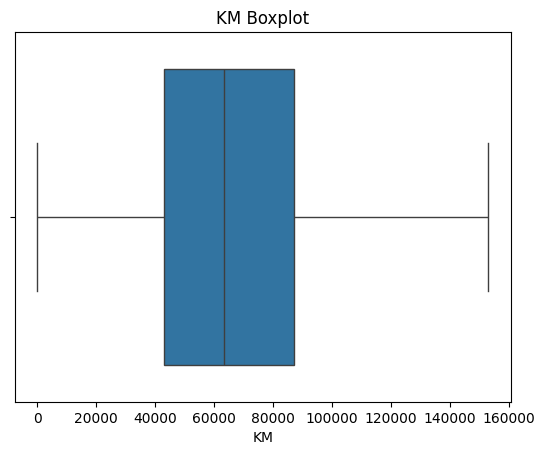

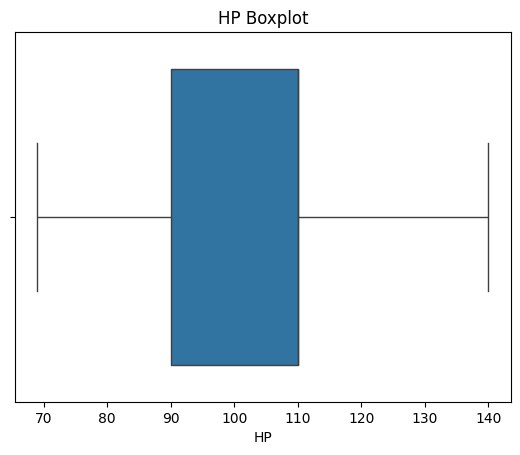

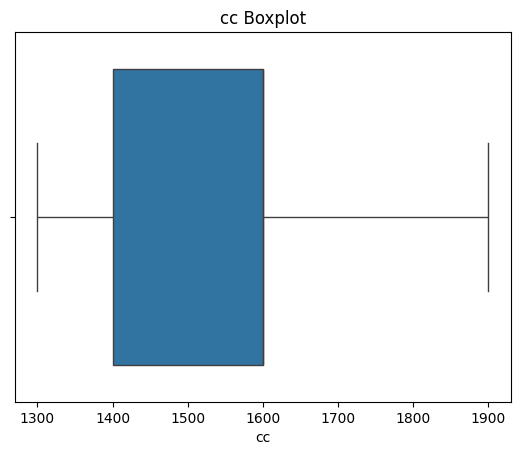

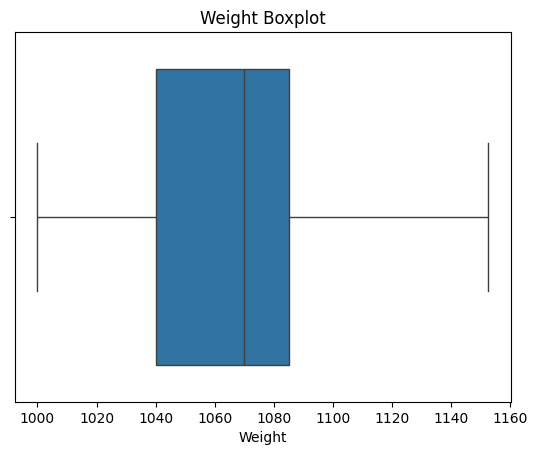

In [128]:
for feature in ['KM', 'HP', 'cc', 'Weight']:
    sns.boxplot(x=data[feature])
    plt.title(f"{feature} Boxplot")
    plt.show()

In [129]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986.0,Diesel,90,0,1900,3,4,5,1152.5
1,13750,23,72937.0,Diesel,90,0,1900,3,4,5,1152.5
2,13950,24,41711.0,Diesel,90,0,1900,3,4,5,1152.5
3,14950,26,48000.0,Diesel,90,0,1900,3,4,5,1152.5
4,13750,30,38500.0,Diesel,90,0,1900,3,4,5,1152.5
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,Petrol,86,0,1300,3,4,5,1025.0
1432,10845,72,19000.0,Petrol,86,0,1300,3,4,5,1015.0
1433,8500,71,17016.0,Petrol,86,0,1300,3,4,5,1015.0
1434,7250,70,16916.0,Petrol,86,0,1300,3,4,5,1015.0


In [130]:
data['Petrol'] = data['Fuel_Type'].apply(lambda x: 1 if x == 'Petrol' else 0)
data['Diesel'] = data['Fuel_Type'].apply(lambda x: 1 if x == 'Diesel' else 0)
data['CNG'] = data['Fuel_Type'].apply(lambda x: 1 if x == 'CNG' else 0)

data.drop('Fuel_Type', axis=1, inplace=True)


In [131]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Petrol,Diesel,CNG
0,13500,23,46986.0,90,0,1900,3,4,5,1152.5,0,1,0
1,13750,23,72937.0,90,0,1900,3,4,5,1152.5,0,1,0
2,13950,24,41711.0,90,0,1900,3,4,5,1152.5,0,1,0
3,14950,26,48000.0,90,0,1900,3,4,5,1152.5,0,1,0
4,13750,30,38500.0,90,0,1900,3,4,5,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,86,0,1300,3,4,5,1025.0,1,0,0
1432,10845,72,19000.0,86,0,1300,3,4,5,1015.0,1,0,0
1433,8500,71,17016.0,86,0,1300,3,4,5,1015.0,1,0,0
1434,7250,70,16916.0,86,0,1300,3,4,5,1015.0,1,0,0


In [132]:
data['Automatic'].unique()


array([0, 1])

In [133]:
correlation_matrix = data.corr()
correlation_matrix['Price'].sort_values(ascending=False)


,Price
Price,1.000000
Weight,0.509536
HP,0.255640
Doors,0.184211
cc,0.132106
Gears,0.052827
Automatic,0.035415
Petrol,0.010402
Diesel,0.002931
CNG,-0.039638


In [134]:
# These columns (Petrol, Diesel, CNG, Cylinders) are not useful for prediction as their correlation with Price is almost zero or missing, so removing them to keep the model clean
data.drop(['Petrol', 'Diesel', 'CNG', 'Cylinders'], axis=1, inplace=True)


In [135]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986.0,90,0,1900,3,5,1152.5
1,13750,23,72937.0,90,0,1900,3,5,1152.5
2,13950,24,41711.0,90,0,1900,3,5,1152.5
3,14950,26,48000.0,90,0,1900,3,5,1152.5
4,13750,30,38500.0,90,0,1900,3,5,1152.5
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,86,0,1300,3,5,1025.0
1432,10845,72,19000.0,86,0,1300,3,5,1015.0
1433,8500,71,17016.0,86,0,1300,3,5,1015.0
1434,7250,70,16916.0,86,0,1300,3,5,1015.0


In [136]:
data.isnull().sum()


,0
Price,0
Age_08_04,0
KM,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0
Weight,0


In [137]:
data.dtypes


,0
Price,int64
Age_08_04,int64
KM,float64
HP,int64
Automatic,int64
cc,int64
Doors,int64
Gears,int64
Weight,float64


In [138]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986.0,90,0,1900,3,5,1152.5
1,13750,23,72937.0,90,0,1900,3,5,1152.5
2,13950,24,41711.0,90,0,1900,3,5,1152.5
3,14950,26,48000.0,90,0,1900,3,5,1152.5
4,13750,30,38500.0,90,0,1900,3,5,1152.5
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,86,0,1300,3,5,1025.0
1432,10845,72,19000.0,86,0,1300,3,5,1015.0
1433,8500,71,17016.0,86,0,1300,3,5,1015.0
1434,7250,70,16916.0,86,0,1300,3,5,1015.0


In [139]:
# Scaling all columns using StandardScaler to bring every feature to the same level for smoother model training
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [140]:
data = pd.DataFrame(scaled_data, columns=data.columns)

In [141]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
0,1.006237,-1.771966,-0.593750,-0.844850,-0.242893,2.021383,-1.085139,-0.140425,2.222387
1,1.090108,-1.771966,0.153546,-0.844850,-0.242893,2.021383,-1.085139,-0.140425,2.222387
2,1.157205,-1.718184,-0.745652,-0.844850,-0.242893,2.021383,-1.085139,-0.140425,2.222387
3,1.492688,-1.610620,-0.564551,-0.844850,-0.242893,2.021383,-1.085139,-0.140425,2.222387
4,1.090108,-1.395491,-0.838117,-0.844850,-0.242893,2.021383,-1.085139,-0.140425,2.222387
...,...,...,...,...,...,...,...,...,...
1431,-1.006662,0.702015,-1.355186,-1.149198,-0.242893,-1.530776,-1.085139,-0.140425,-1.154070
1432,0.115529,0.863362,-1.399648,-1.149198,-0.242893,-1.530776,-1.085139,-0.140425,-1.418890
1433,-0.671179,0.809579,-1.456780,-1.149198,-0.242893,-1.530776,-1.085139,-0.140425,-1.418890
1434,-1.090533,0.755797,-1.459660,-1.149198,-0.242893,-1.530776,-1.085139,-0.140425,-1.418890


In [142]:
# Splitting data into 80% training and 20% testing to train the model and check its performance on unseen data

X = data.drop('Price', axis=1)  # Features
y = data['Price']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [143]:
# Check for Multicollinearity using VIF
# Select the independent variables
X_features = data.drop('Price', axis=1)

# Add a constant to the features for VIF calculation
X_features = sm.add_constant(X_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_features.columns

# Calculate VIF
vif_data["VIF"] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]

# Display the VIF values
display(vif_data)

,feature,VIF
0,const,1.000000
1,Age_08_04,2.226108
2,KM,1.950754
3,HP,1.306978
4,Automatic,1.127867
5,cc,2.992813
6,Doors,1.379674
7,Gears,1.089949
8,Weight,4.113989


In [144]:

# Initialize and train
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Coefficients and intercept
coefficients_model1 = model1.coef_
intercept_model1 = model1.intercept_

# Predict
y_pred1 = model1.predict(X_test)

# Evaluate
r2_model1 = r2_score(y_test, y_pred1)
mse_model1 = mean_squared_error(y_test, y_pred1)

print(r2_model1)
print(mse_model1)

0.8633972157038337
0.13209287797564245


In [145]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Evaluation
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Model 2 - Ridge Regression")
print("R² Score:", ridge_r2)
print("MSE:", ridge_mse)


Model 2 - Ridge Regression
R² Score: 0.8633851316154657
MSE: 0.1321045631108939


In [146]:

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Evaluation
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("Model 3 - Lasso Regression")
print("R² Score:", lasso_r2)
print("MSE:", lasso_mse)


Model 3 - Lasso Regression
R² Score: 0.8299976058465116
MSE: 0.16438980817402
